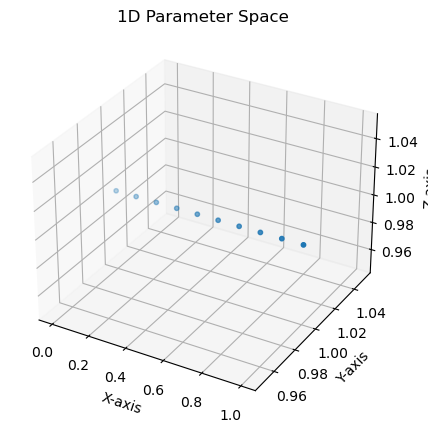

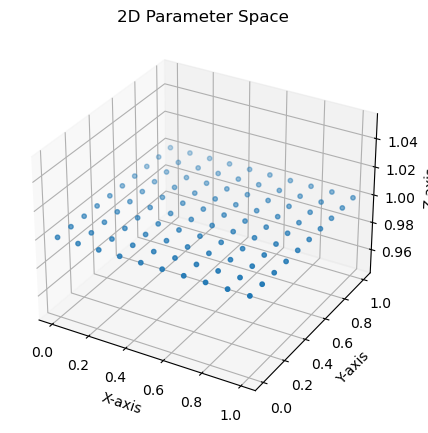

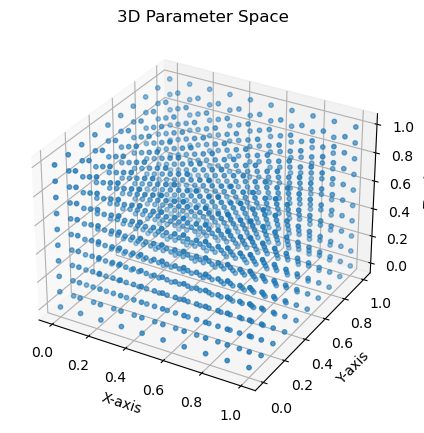

In [93]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def plot_points(x, y, z):
    # Create a 3D plot
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the points
    ax.scatter(x.flatten(), y.flatten(), z.flatten(), s=10)

    # Set titles and labels
    ax.set_title(f'{np.sum(np.array(np.shape(x)) > 1)}D Parameter Space')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')

    # Show plot
    plt.show()

# Generate data for 3D space
points = np.linspace(0, 1, 10)
x, y, z = np.meshgrid(points, 1, 1)
plot_points(x, y, z)
x, y, z = np.meshgrid(points, points, 1)
plot_points(x, y, z)
x, y, z = np.meshgrid(points, points, points)
plot_points(x, y, z)


In [94]:
import pybamm
model = pybamm.lithium_ion.DFN()
parameter_values = pybamm.ParameterValues("Chen2020")
experiment = pybamm.Experiment(
    [
        "Discharge at 2C for 20 minutes",
        "Rest for 10 minutes",
    ], period="30 seconds"
)
sim = pybamm.Simulation(model, experiment=experiment, parameter_values=parameter_values)
solution = sim.solve()

In [95]:
plotter = pybamm.QuickPlot(solutions=solution, time_unit="hours")
plotter.dynamic_plot()

interactive(children=(FloatSlider(value=0.0, description='t', max=0.5, step=0.005), Output()), _dom_classes=('…

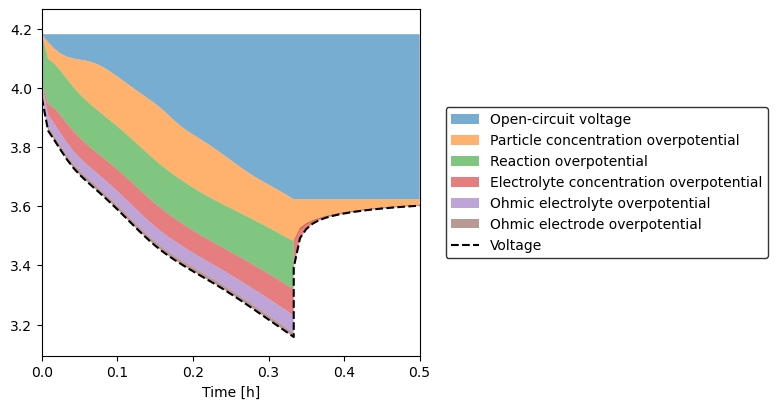

(<Figure size 800x400 with 1 Axes>, <Axes: xlabel='Time [h]'>)

In [96]:
pybamm.plot_voltage_components(solution)

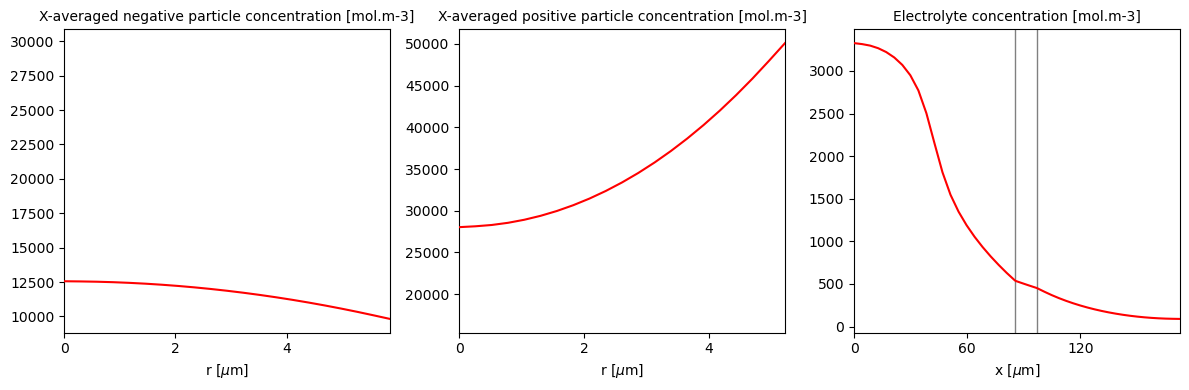

In [97]:
plotter = pybamm.QuickPlot(solutions=[solution], output_variables=[
    "X-averaged negative particle concentration [mol.m-3]",
    "X-averaged positive particle concentration [mol.m-3]",
    "Electrolyte concentration [mol.m-3]"
    ])
plotter.plot(t=[1200]) # At point of rest


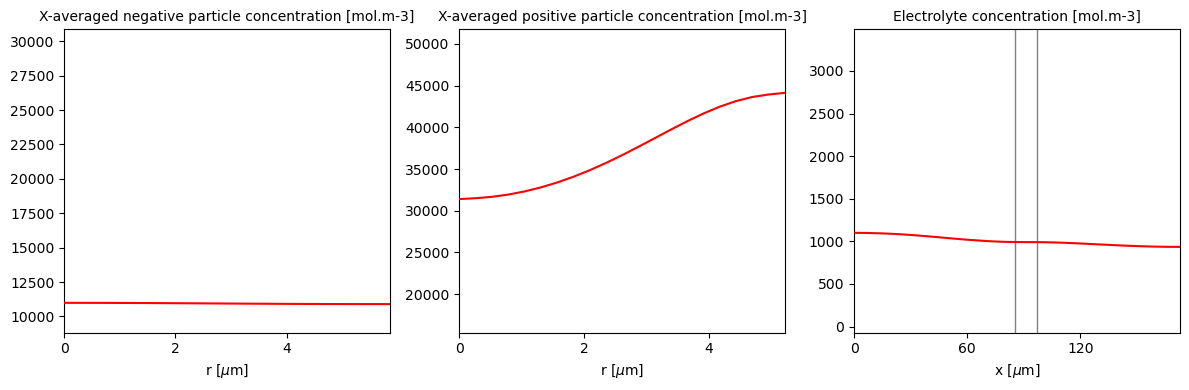

In [98]:
plotter.plot(t=[1380]) # 3 minutes after rest

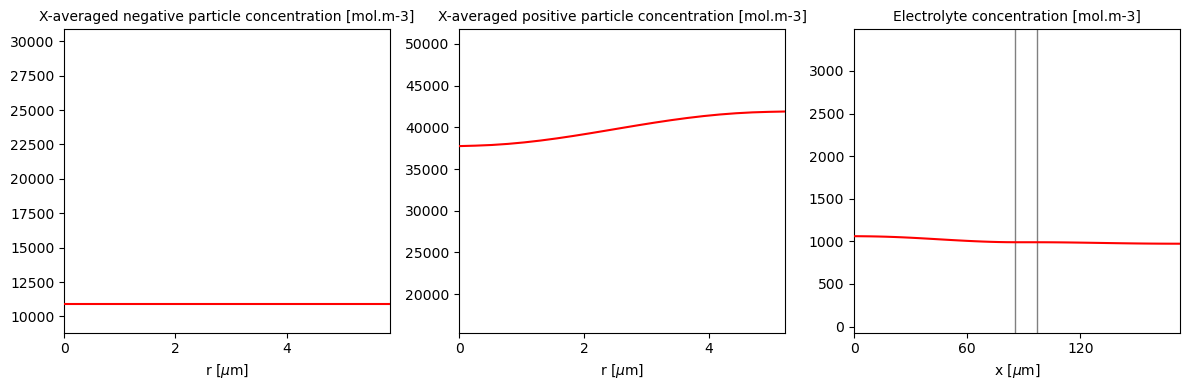

In [99]:
plotter.plot(t=[1800]) # 10 minutes after rest

In [100]:
parameter_values["Positive particle radius [m]"]

5.22e-06

In [101]:
parameter_values["Positive particle radius [m]"] = 3.0e-6

In [102]:
sim2 = pybamm.Simulation(model, experiment=experiment, parameter_values=parameter_values)
solution2 = sim2.solve()

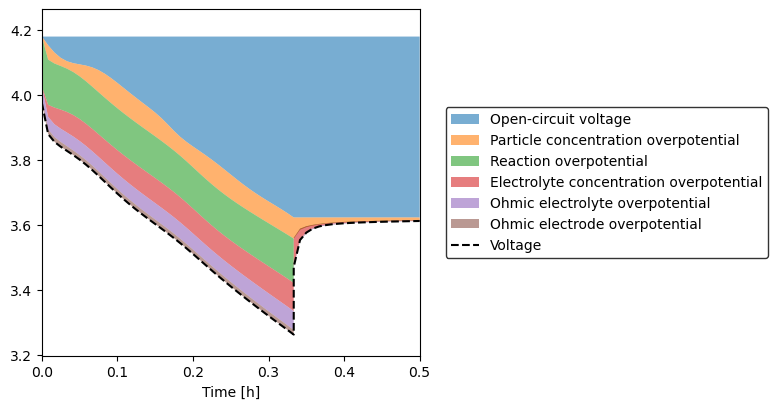

(<Figure size 800x400 with 1 Axes>, <Axes: xlabel='Time [h]'>)

In [103]:
pybamm.plot_voltage_components(solution2)

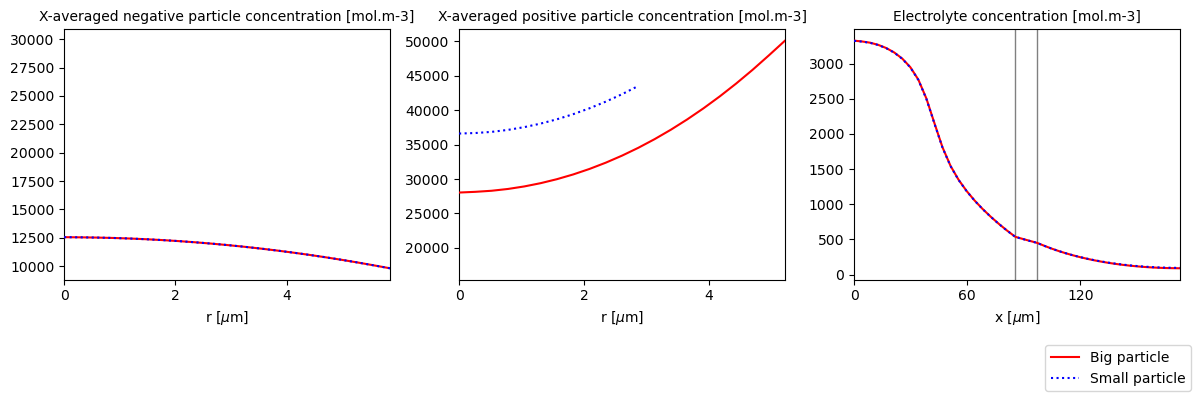

In [104]:
plotter = pybamm.QuickPlot(solutions=[solution, solution2], labels=["Big particle","Small particle"], output_variables=[
    "X-averaged negative particle concentration [mol.m-3]",
    "X-averaged positive particle concentration [mol.m-3]",
    "Electrolyte concentration [mol.m-3]"
    ])
plotter.plot(t=[1200]) # At point of rest

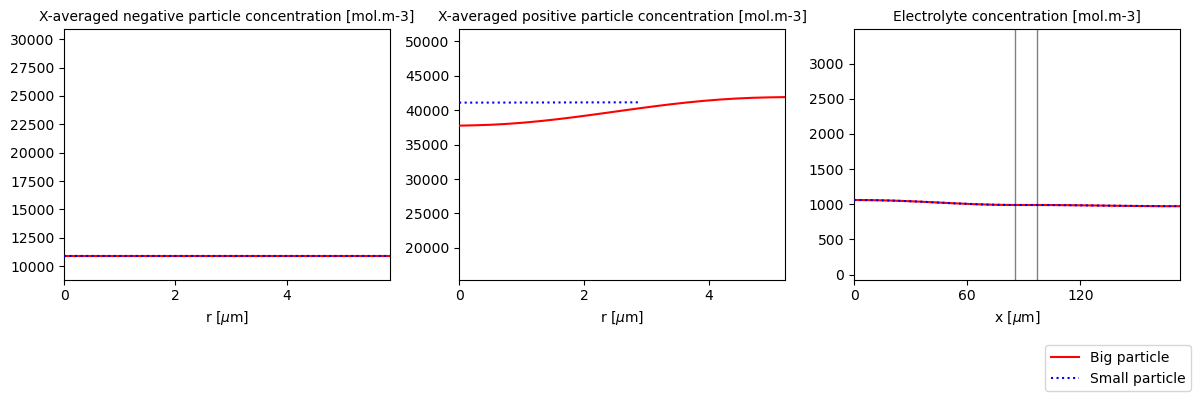

In [105]:
plotter.plot(t=[1800])

In [106]:
pybamm.print_citations()

[1] Joel A. E. Andersson, Joris Gillis, Greg Horn, James B. Rawlings, and Moritz Diehl. CasADi – A software framework for nonlinear optimization and optimal control. Mathematical Programming Computation, 11(1):1–36, 2019. doi:10.1007/s12532-018-0139-4.
[2] Chang-Hui Chen, Ferran Brosa Planella, Kieran O'Regan, Dominika Gastol, W. Dhammika Widanage, and Emma Kendrick. Development of Experimental Techniques for Parameterization of Multi-scale Lithium-ion Battery Models. Journal of The Electrochemical Society, 167(8):080534, 2020. doi:10.1149/1945-7111/ab9050.
[3] Marc Doyle, Thomas F. Fuller, and John Newman. Modeling of galvanostatic charge and discharge of the lithium/polymer/insertion cell. Journal of the Electrochemical society, 140(6):1526–1533, 1993. doi:10.1149/1.2221597.
[4] Charles R. Harris, K. Jarrod Millman, Stéfan J. van der Walt, Ralf Gommers, Pauli Virtanen, David Cournapeau, Eric Wieser, Julian Taylor, Sebastian Berg, Nathaniel J. Smith, and others. Array programming with